In [1]:
import pandas as pd
import pickle
def save(data , fn):
    with open(fn, 'wb') as f:
        pickle.dump(data, f)
def load(fn): 
    with open(fn, 'rb') as f:
        data = pickle.load(f)
        f.close()
    return data

In [2]:
PTTEP = load("./PTTEP.pkl")

In [4]:
histo = []
dayy = []

In [5]:
for i in PTTEP['TRADE'].keys():
    if i == '20190301':
        break
    histo.append(PTTEP['TRADE'][i]["Price"].iloc[-1])
    dayy.append(i)

In [6]:
his_price =  pd.DataFrame(
{"historical price" : histo, 
}, 
index = dayy)

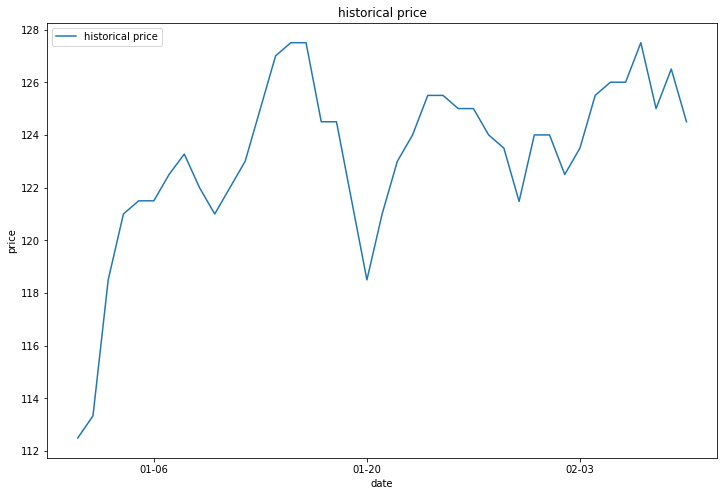

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(his_price.index.tolist(), his_price["historical price"], label="historical price")

plt.title('historical price')
plt.xlabel("date")
plt.ylabel("price")

plt.legend()

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

plt.show()

In [8]:
import numpy as np

Return = his_price['historical price'].pct_change() # คิด daily return
log_Return = np.log(1 + Return) # คิด log return

In [9]:
import math

std = log_Return.std()
vol = std * math.sqrt(252)
vol

0.22858089338471288

In [10]:
days = []
prices = []

In [11]:
TRADE3 = load("./TRADE_201903.obj")
for i in TRADE3.keys():     
    days.append(i)
    prices.append(TRADE3[i]["Price"].iloc[-1])

In [12]:
TRADE4 = load("./TRADE_201904.obj")
for i in TRADE4.keys():     
    days.append(i)
    prices.append(TRADE4[i]["Price"].iloc[-1])

In [13]:
TRADE5 = load("./TRADE_201905.obj")
for i in TRADE5.keys():     
    days.append(i)
    prices.append(TRADE5[i]["Price"].iloc[-1])

In [14]:
TRADE6 = load("./TRADE_201906.obj")
for i in TRADE6.keys():     
    days.append(i)
    prices.append(TRADE6[i]["Price"].iloc[-1])

In [15]:
import math
import datetime
from datetime import datetime
import numpy as np
from scipy.stats import norm

class EuropeanCall:

    def call_delta(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        return z1
    
    def call_price(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration           
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        z1 = z1*asset_price
        x2 = math.log(asset_price/(b*strike_price)) - .5*(asset_volatility*asset_volatility)*time_to_expiration
        x2 = x2/(asset_volatility*(time_to_expiration**.5))
        z2 = norm.cdf(x2)
        z2 = b*strike_price*z2
        return z1 - z2

    def __init__(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.price = self.call_price(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)
        self.delta = self.call_delta(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)   
        
class EuropeanPut:

    def put_delta(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        return z1 - 1
    
    def put_price(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log((b*strike_price)/asset_price) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        z1 = b*strike_price*z1
        x2 = math.log((b*strike_price)/asset_price) - .5*(asset_volatility*asset_volatility)*time_to_expiration
        x2 = x2/(asset_volatility*(time_to_expiration**.5))
        z2 = norm.cdf(x2)
        z2 = asset_price*z2
        return z1 - z2
    
    def __init__(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.price = self.put_price(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)
        self.delta = self.put_delta(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)

In [16]:
from datetime import datetime
days_new = []
for i in days:
    time = f'{i[0:4]}-{i[4:6]}-{i[6:]}'
    date_time_obj = datetime.strptime(time, '%Y-%m-%d')
    days_new.append(date_time_obj)    

In [17]:
start_date = days_new[0]
ex = days_new[len(days)-1]
total = ex-start_date # จำนวนวันทั้งหมด ตั้งแต่วันแรกถึงวันคบกำหนด

In [18]:
# short call option : strike price=130, r=6%
initial_sc = EuropeanCall(prices[0], vol, 130, total.days/365, 0.06)

In [19]:
time = []
for i in range(0,len(days_new)):
    date = days_new[i]
    t = ex-date
    if t.days==0 :
        time.append(1)
        continue
    time.append(t.days)

In [20]:
# hedge delta : delta ของการhedge แต่ละครั้ง
# sc_delta : delta ของ short call option แต่ละรอบ
# opt_price ราคา option ของแต่ละวัน
hedge_deltas = []
sc_deltas = []
opt_price = []
for i in range(0,len(days)):
    call = EuropeanCall(prices[i], initial_sc.asset_volatility, initial_sc.strike_price, time[i]/365, initial_sc.risk_free_rate)
    hedge_deltas.append(call.delta)    
    sc_deltas.append(-1*call.delta)
    opt_price.append(call.price)

In [21]:
contract = 10000 # มี option ทั้งหมด 10,000 สัญญา
share_per_contract = 100 # สัญญาละ 100 หุ้น
total_share = share_per_contract*contract
sc_option_price = initial_sc.price
premium = sc_option_price*total_share # ค่า premium = option price x จำนวนหุ้นทั้งหมด
start_price = prices[0]
share_held = round(total_share*hedge_deltas[0]) # จำนวนหุ้นที่จะlong เพื่อhedgeในวันแรก
share_held = (share_held // 100) * 100
cumulative_cost = round(share_held*prices[0]) # เงินที่ต้องใช้ในการซื้อหุ้นมาถือเพื่อ hedge ในวันแรก
funding_interest = round(cumulative_cost*initial_sc.risk_free_rate/365) # funding interest จากการซื้อหุ้นของวันแรก

In [22]:
share_helds = []
funding_interests = []
cumulative_costs = []
PandLs = []
share_helds.append(share_held)
funding_interests.append(funding_interest)
cumulative_costs.append(cumulative_cost)
PandLs.append(round(premium)) # profit and loss ของวันแรก เท่ากับ premium

In [23]:
# คำนวณ share held, funding interest, cumulative และ daily return ของแต่ละวัน
for i in range(1,len(days)):    
    share_held = round(total_share*hedge_deltas[i])
    share_held = (share_held // 100) * 100
    d_share_held = share_held-share_helds[i-1] # เช็คว่าปริมาณหุ้นที่ถือเพื่อทำการ hedge ของวันนี้ มากกว่าหรือน้อยกว่าปริมาณหุ้นที่ถือเมื่อวาน
    if d_share_held < 0: # ถ้าผลต่างเป็นลบ แปลว่าเราจะขายหุ้นที่ถือออกไป
        if d_share_held <= -100: # เช็คว่าหุ้นที่จะขายออกไป มีปริมาณมากกว่า100หรือไม่
            cost = prices[i]*d_share_held
            cumulative_cost = cumulative_cost+cost # เงินที่ได้จากการขายหุ้นออกไป จะนำไปหักล้างกับค่า cumulative
        elif d_share_held > -100: # ถ้าปริมาณหุ้นไม่ถึง 100 จะไม่เกิดการขาย hedge delta จะเท่าเดิมไม่เปลี่ยนแปลง
            hedge_deltas[i] = hedge_deltas[i-1]
        cumulative_cost = cumulative_cost+funding_interests[i-1] # ค่า funding interest ของรอบที่แล้ว จะนำมารวมกับcumulative
    elif d_share_held > 0: # ถ้าผลต่างเป็นบวก แปลว่าเราจะซื้อหุ้นมาถือเพิ่ม
        if d_share_held >= 100: # เช็คว่าหุ้นที่จะซื้อ มีปริมาณมากกว่า100หรือไม่
            cost = prices[i]*d_share_held
            cumulative_cost = cumulative_cost+cost # เงินที่ใช้ซื้อหุ้นมาถือเพิ่ม จะนำไปรวมกับ cumulative
        elif d_share_held < 100: # ถ้าปริมาณหุ้นไม่ถึง 100 จะไม่เกิดการซื้อhedge delta จะเท่าเดิมไม่เปลี่ยนแปลง
            hedge_deltas[i] = hedge_deltas[i-1]
        cumulative_cost = cumulative_cost+funding_interests[i-1] # ค่า funding interest ของรอบที่แล้ว จะนำมารวมกับcumulative    
    share_held = round(total_share*hedge_deltas[i])
    share_held = (share_held // 100) * 100
    share_helds.append(share_held)
    cumulative_costs.append(round(cumulative_cost))
    funding_interest = round(share_held*prices[i]*initial_sc.risk_free_rate/365)
    funding_interests.append(funding_interest)
    d_opt_price = opt_price[i] - opt_price[i-1] # หาผลต่างของราคา option ของวันนี้กับวันที่ผ่านมา
    PandL = d_opt_price*total_share - cumulative_cost + share_held * prices[i] + premium 
# p&l คิดจากผลต่างของราคา option คูณกับจำนวนหุ้นทั้งหมด - cumulative ที่สะสมมาทั้งหมด + ปริมาณหุ้นที่ซื้อมาถือเพิ่มคูณกับราคาของหุ้นอ้างอิง + premium
    PandLs.append(round(PandL))

In [24]:
if prices[len(prices)-1] > initial_sc.strike_price + sc_option_price: # ถ้าราคาของหุ้นอ้างอิงในวันครบกำหนดมากกว่า ค่าของstrike priceบวกกับค่าoption price. option จะมีสถานะ OTM
    print("OTM")
    PandL = (total_share - share_helds[len(share_helds)-1]) * (-prices[len(prices)-1]) + initial_sc.strike_price *total_share + premium - cumulative_costs[len(cumulative_costs)-1]
#p&lคิดจาก-1*ปริมาณหุ้นที่เราขาดเพื่อให้ครบตามสัญญาคูณกับราคาหุ้นอ้างอิงวันสุดท้าย + ราคาstrike priceคูณกับปริมาณหุ้นตามสัญญา +premium-cumulative ที่สะสมมาทั้งหมด
elif prices[len(prices)-1] <= initial_sc.strike_price + sc_option_price: # ถ้าราคาของหุ้นอ้างอิงในวันครบกำหนดน้อยกว่า ค่าของstrike priceบวกกับค่าoption price. option จะมีสถานะ ITM
    print("ITM")
    PandL = premium - cumulative_costs[len(cumulative_costs)-1]+share_helds[len(share_helds)-1]*prices[len(prices)-1]
#p&l คิดจากpremium  -cumulative ที่สะสมมาทั้งหมด                      บวกกับปริมาณหุ้นที่ซื้อมาถือเพิ่มคูณกับราคาของหุ้นอ้างอิงวันสุดท้าย
PandL1 = round(PandL)
print("profit and loss 1 =", PandL1)

OTM
profit and loss 1 = 1636178


In [25]:
PandLs[len(PandLs)-1] = PandL1

In [26]:
import pandas as pd

# นำข้อมูลต่างๆ มาแสดงผลในรูปแบบ DataFrame
df_sc =  pd.DataFrame(
{"asset price" : prices,
 "option price" : opt_price,
 "short call delta" : sc_deltas,
 "hedge delta" : hedge_deltas,
 "share held:" : share_helds,
 "funding interest" : funding_interests,
 "cumulative costs" : cumulative_costs,
 "profit and loss" : PandLs,
}, 
index = days_new)


In [27]:
df_sc

,asset price,option price,short call delta,hedge delta,share held:,funding interest,cumulative costs,profit and loss
2019-03-01,123.5000,4.730404,-0.429415,0.429415,429400,8717,53030900,4730404
2019-03-04,122.3600,4.156342,-0.398354,0.398354,398300,8011,49234221,3658109
2019-03-05,122.5000,4.178597,-0.400655,0.400655,400600,8067,49523982,4302177
2019-03-06,121.5000,3.757552,-0.374952,0.374952,374900,7488,46409499,3450210
2019-03-07,122.5000,4.110853,-0.398365,0.398365,398300,8021,49283487,4591969
...,...,...,...,...,...,...,...,...
2019-06-24,136.0000,6.119433,-0.972888,0.972888,972800,21748,129305276,8474203
2019-06-25,135.5000,5.586018,-0.979010,0.979010,979000,21806,130167124,6684365
2019-06-26,134.0000,4.073775,-0.965541,0.965541,965500,21267,128379930,4215231
2019-06-27,135.3895,5.411001,-0.999681,0.999681,999600,22247,133017979,8384995


In [28]:
days2 = []
prices2 = []
hours = []
timestamps = []

In [29]:
first = 1
for i in TRADE3.keys():     
    for j in TRADE3[i]['Timestamp'].keys():
        now = TRADE3[i]['Timestamp'][j].hour
        if first == 1:
            first = 0
            before = now
            continue
        if now == before:
            before = now
            price = TRADE3[i]['Price'][j]
            continue
        prices2.append(price)
        hours.append(now)
        days2.append(i)
        timestamps.append(TRADE3[i]['Timestamp'][j])
        before = now

In [30]:
first = 1
for i in TRADE4.keys():     
    for j in TRADE4[i]['Timestamp'].keys():
        now4 = TRADE4[i]['Timestamp'][j].hour
        if first == 1:
            first = 0
            before4 = now4
            continue
        if now4 == before4:
            before4 = now4
            price = TRADE4[i]['Price'][j]
            continue
        prices2.append(price)
        hours.append(now4)
        days2.append(i)
        timestamps.append(TRADE4[i]['Timestamp'][j])
        before4 = now4

In [31]:
first = 1
for i in TRADE5.keys():     
    for j in TRADE5[i]['Timestamp'].keys():
        now5 = TRADE5[i]['Timestamp'][j].hour
        if first == 1:
            first = 0
            before5 = now5
            continue
        if now5 == before5:
            before5 = now5
            price = TRADE5[i]['Price'][j]
            continue
        prices2.append(price)
        hours.append(now5)
        days2.append(i)
        timestamps.append(TRADE5[i]['Timestamp'][j])
        before5 = now5

In [32]:
first = 1
for i in TRADE6.keys():     
    for j in TRADE6[i]['Timestamp'].keys():
        now6 = TRADE6[i]['Timestamp'][j].hour
        if first == 1:
            first = 0
            before6 = now6
            continue
        if now6 == before6:
            before6 = now6
            price = TRADE6[i]['Price'][j]
            continue
        prices2.append(price)
        hours.append(now6)
        days2.append(i)
        timestamps.append(TRADE6[i]['Timestamp'][j])
        before6 = now6

In [33]:
t0 = timestamps[0]
tfin = timestamps[len(timestamps)-1]
duration = tfin-t0
duration_in_s = duration.total_seconds() 
total_h = divmod(duration_in_s, 3600)[0] # จำนวนชั่วโมงทั้งหมด ตั้งแต่วันแรกถึงวันครบกำหนด

In [34]:
class EuropeanCall2:

    def call_delta(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        return z1
    
    def call_price(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration           
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        z1 = z1*asset_price
        x2 = math.log(asset_price/(b*strike_price)) - .5*(asset_volatility*asset_volatility)*time_to_expiration
        x2 = x2/(asset_volatility*(time_to_expiration**.5))
        z2 = norm.cdf(x2)
        z2 = b*strike_price*z2
        return z1 - z2

    def __init__(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.price = self.call_price(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)
        self.delta = self.call_delta(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate) 

In [35]:
# short call option : strike price=130, r=6% , 8760คือจำนวนชั่วโมงทั้งหมดของ1ปี นำมาใช้แทน365ที่เป็นจำนวนวันทั้งหมด
initial_sc2 = EuropeanCall2(prices2[0], vol, 130, total_h/8760, 0.06)

In [36]:
t = []
for i in range(0,len(days2)):
    now = timestamps[i]
    duration = tfin - now
    duration_in_s = duration.total_seconds() 
    total_h = divmod(duration_in_s, 3600)[0]
    if total_h==0 :
        t.append(1)
        continue
    t.append(total_h)

In [37]:
# hedge delta 2 : delta ของการhedge แต่ละครั้ง
# sc_delta 2 : delta ของ short call option แต่ละรอบ
# opt_price2  ราคา option ของแต่ละชั่วโมง
hedge_deltas2 = []
sc_deltas2 = []
opt_price2 = []
for i in range(0,len(days2)):
    call = EuropeanCall2(prices2[i], initial_sc2.asset_volatility, initial_sc2.strike_price, t[i]/8760, initial_sc2.risk_free_rate)
    hedge_deltas2.append(call.delta)
    sc_deltas2.append(-1*call.delta)
    opt_price2.append(call.price)

In [38]:
total_share = share_per_contract*contract
sc_option_price = initial_sc2.price
premium = sc_option_price*total_share # ค่า premium = option price x จำนวนหุ้นทั้งหมด
start_price = prices2[0]
share_held = round(total_share*hedge_deltas2[0]) # จำนวนหุ้นที่จะlong เพื่อhedgeในวันแรก
share_held = (share_held // 100) * 100
cumulative_cost = round(share_held*prices2[0]) # เงินที่ต้องใช้ในการซื้อหุ้นมาถือเพื่อ hedge ในวันแรก
funding_interest = round(cumulative_cost*initial_sc2.risk_free_rate/8760) # funding interest จากการซื้อหุ้นของวันแรก

In [39]:
share_helds2 = []
funding_interests2 = []
cumulative_costs2 = []
daily_returns2 = []
PandLs2 = []
share_helds2.append(share_held)
funding_interests2.append(funding_interest)
cumulative_costs2.append(cumulative_cost)
PandLs2.append(round(premium)) # profit and loss ของชั่วโมงแรก เท่ากับ premium

In [40]:
# คำนวณ share held, funding interest, cumulative และ daily return ของแต่ละชั่วโมง
for i in range(1,len(timestamps)):  
    share_held = round(total_share*hedge_deltas2[i])
    share_held = (share_held // 100) * 100
    d_share_held = share_held-share_helds2[i-1] # เช็คว่าปริมาณหุ้นที่ถือเพื่อทำการ hedge ของวันนี้ มากกว่าหรือน้อยกว่าปริมาณหุ้นที่ถือเมื่อวาน
    if d_share_held < 0: # ถ้าผลต่างเป็นลบ แปลว่าเราจะขายหุ้นที่ถือออกไป
        if d_share_held <= -100: # เช็คว่าหุ้นที่จะขายออกไป มีปริมาณมากกว่า100หรือไม่
            cost = prices2[i]*d_share_held
            cumulative_cost = cumulative_cost+cost # เงินที่ได้จากการขายหุ้นออกไป จะนำไปหักล้างกับค่า cumulative
        elif d_share_held > -100: # ถ้าปริมาณหุ้นไม่ถึง 100 จะไม่เกิดการขาย hedge delta จะเท่าเดิมไม่เปลี่ยนแปลง
            hedge_deltas2[i] = hedge_deltas2[i-1]
        cumulative_cost = cumulative_cost+funding_interests2[i-1] # ค่า funding interest ของรอบที่แล้ว จะนำมารวมกับcumulative
    elif d_share_held > 0: # ถ้าผลต่างเป็นบวก แปลว่าเราจะซื้อหุ้นมาถือเพิ่ม
        if d_share_held > 100: # เช็คว่าหุ้นที่จะซื้อ มีปริมาณมากกว่า100หรือไม่
            cost = prices2[i]*d_share_held
            cumulative_cost = cumulative_cost+cost # เงินที่ใช้ซื้อหุ้นมาถือเพิ่ม จะนำไปรวมกับ cumulative
        elif d_share_held < 100: # ถ้าปริมาณหุ้นไม่ถึง 100 จะไม่เกิดการซื้อhedge delta จะเท่าเดิมไม่เปลี่ยนแปลง
            hedge_deltas2[i] = hedge_deltas2[i-1]
        cumulative_cost = cumulative_cost+funding_interests2[i-1] # ค่า funding interest ของรอบที่แล้ว จะนำมารวมกับcumulative
    share_held = round(total_share*hedge_deltas2[i])
    share_held = (share_held // 100) * 100
    share_helds2.append(share_held)
    cumulative_costs2.append(round(cumulative_cost))
    funding_interest = round(share_held*prices2[i]*initial_sc2.risk_free_rate/8760)
    funding_interests2.append(funding_interest)
    d_opt_price = opt_price2[i] - opt_price2[i-1] # หาผลต่างของราคา option ของชั่วโมงปัจจุบันกับชั่วโมงที่ผ่านมา
    PandL = d_opt_price*total_share - cumulative_cost + share_held * prices2[i] + premium
# p&l คิดจากผลต่างของราคา option คูณกับจำนวนหุ้นทั้งหมด - cumulative ที่สะสมมาทั้งหมด + ปริมาณหุ้นที่ซื้อมาถือเพิ่มคูณกับราคาของหุ้นอ้างอิง + premium
    PandLs2.append(round(PandL))

In [41]:
if prices2[len(prices2)-1] > initial_sc2.strike_price + sc_option_price: # ถ้าราคาของหุ้นอ้างอิงในวันครบกำหนดมากกว่า ค่าของstrike priceบวกกับค่าoption price. option จะมีสถานะ OTM
    print("OTM")
    PandL = (total_share - share_helds2[len(share_helds2)-1]) * (-prices2[len(prices2)-1]) + initial_sc2.strike_price *total_share + premium - cumulative_costs2[len(cumulative_costs2)-1]
#p&lคิดจาก-1*ปริมาณหุ้นที่เราขาดเพื่อให้ครบตามสัญญาคูณกับราคาหุ้นอ้างอิงวันสุดท้าย + ราคาstrike priceคูณกับปริมาณหุ้นตามสัญญา +premium-cumulative ที่สะสมมาทั้งหมด
elif prices2[len(prices2)-1] <= initial_sc2.strike_price + sc_option_price: # ถ้าราคาของหุ้นอ้างอิงในวันครบกำหนดน้อยกว่า ค่าของstrike priceบวกกับค่าoption price. option จะมีสถานะ ITM
    print("ITM")
    PandL = premium - cumulative_costs2[len(cumulative_costs2)-1]+share_helds2[len(share_helds2)-1]*prices2[len(prices2)-1]
#p&l คิดจากpremium  -cumulative ที่สะสมมาทั้งหมด                      บวกกับปริมาณหุ้นที่ซื้อมาถือเพิ่มคูณกับราคาของหุ้นอ้างอิงวันสุดท้าย
PandL2 = round(PandL)
print("profit and loss 2 =", PandL2)

OTM
profit and loss 2 = 282218


In [42]:
PandLs2[len(PandLs2)-1] = PandL2

In [43]:
# นำข้อมูลต่างๆ มาแสดงผลในรูปแบบ DataFrame
df_sc2 =  pd.DataFrame(
{"asset price" : prices2,
 "option price" : opt_price2,
 "short call delta" : sc_deltas2,
 "hedge delta" : hedge_deltas2,
 "share held:" : share_helds2,
 "funding interest" : funding_interests2,
 "cumulative costs" : cumulative_costs2,
 "profit and loss" : PandLs2,
}, 
index = timestamps)

In [44]:
df_sc2

,asset price,option price,short call delta,hedge delta,share held:,funding interest,cumulative costs,profit and loss
2019-03-01 10:00:41.107,125.0,5.409438,-0.466164,0.466164,466100,399,58262500,5409438
2019-03-01 11:00:11.263,124.5,5.179400,-0.453986,0.453986,453900,387,56743999,4945951
2019-03-01 12:01:21.835,124.5,5.176444,-0.453910,0.453910,453900,387,56743999,5173033
2019-03-01 14:27:27.359,124.5,5.173487,-0.453834,0.453834,453800,387,56731936,5172645
2019-03-01 15:00:21.196,124.5,5.172008,-0.453797,0.453797,453700,387,56719873,5173736
...,...,...,...,...,...,...,...,...
2019-06-28 11:00:03.658,136.0,6.004452,-1.000000,1.000000,1000000,932,135127220,6281327
2019-06-28 12:00:01.158,135.5,5.503562,-1.000000,1.000000,1000000,928,135127220,5281327
2019-06-28 14:25:10.336,135.5,5.500890,-1.000000,1.000000,1000000,928,135127220,5779547
2019-06-28 15:00:05.962,135.5,5.500890,-1.000000,1.000000,1000000,928,135127220,5782218


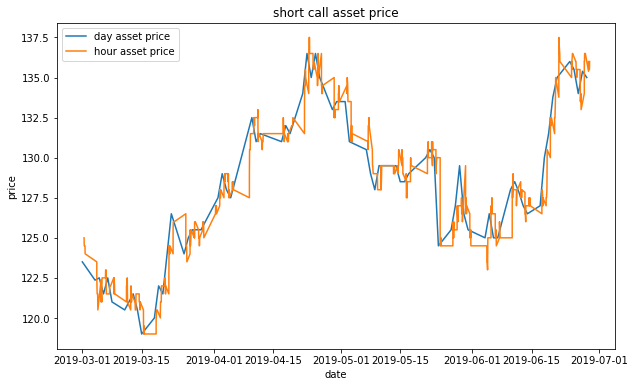

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["asset price"], label="day asset price")
plt.plot(df_sc2.index.tolist(), df_sc2["asset price"], label="hour asset price")

plt.title('short call asset price')
plt.xlabel("date")
plt.ylabel("price")

plt.legend()

plt.show()

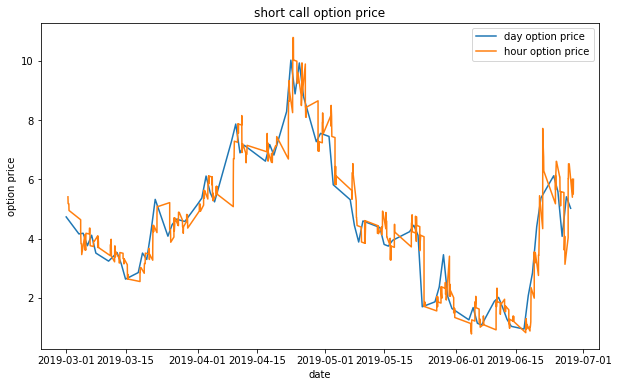

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["option price"], label="day option price")
plt.plot(df_sc2.index.tolist(), df_sc2["option price"], label="hour option price")

plt.title('short call option price')
plt.xlabel("date")
plt.ylabel("option price")

plt.legend()

plt.show()

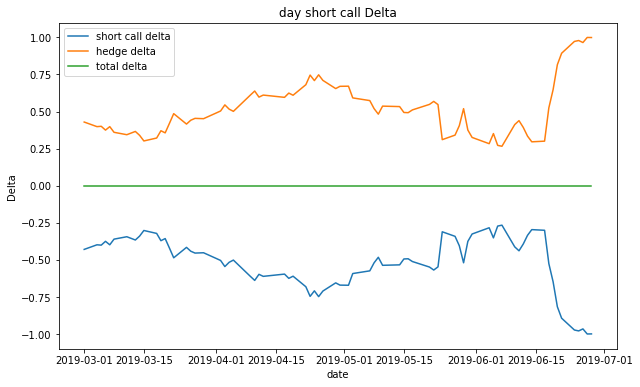

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["short call delta"], label="short call delta")
plt.plot(df_sc.index.tolist(), df_sc["hedge delta"], label="hedge delta")
plt.plot(df_sc.index.tolist(), df_sc["short call delta"]+df_sc["hedge delta"], label="total delta")

plt.title('day short call Delta')
plt.xlabel("date")
plt.ylabel("Delta")

plt.legend()

plt.show()

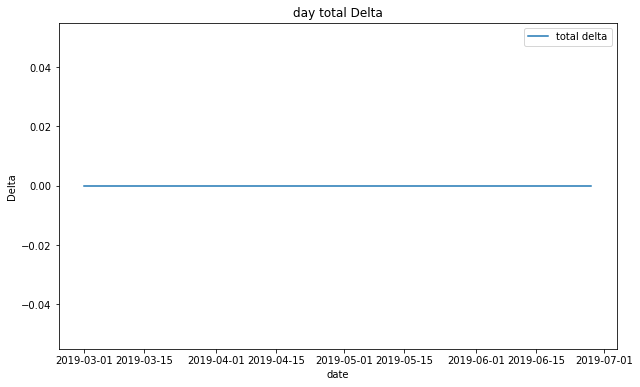

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["short call delta"]+df_sc["hedge delta"], label="total delta")

plt.title('day total Delta')
plt.xlabel("date")
plt.ylabel("Delta")

plt.legend()


plt.show()

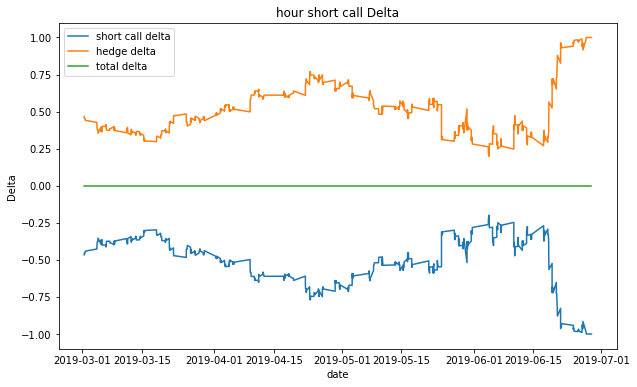

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc2.index.tolist(), df_sc2["short call delta"], label="short call delta")
plt.plot(df_sc2.index.tolist(), df_sc2["hedge delta"], label="hedge delta")
plt.plot(df_sc2.index.tolist(), df_sc2["short call delta"]+df_sc2["hedge delta"], label="total delta")

plt.title('hour short call Delta')
plt.xlabel("date")
plt.ylabel("Delta")

plt.legend()

plt.show()

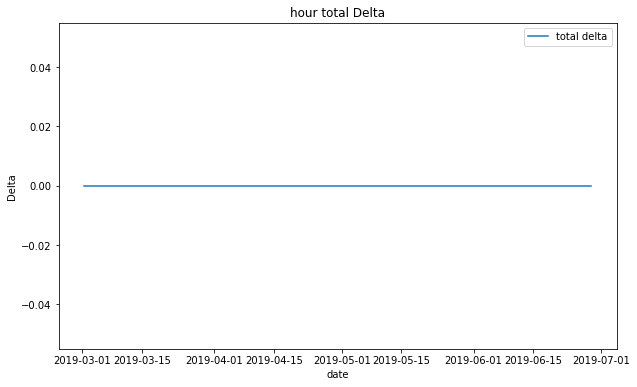

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc2.index.tolist(), df_sc2["short call delta"]+df_sc2["hedge delta"], label="total delta")

plt.title('hour total Delta')
plt.xlabel("date")
plt.ylabel("Delta")

plt.legend()

plt.show()

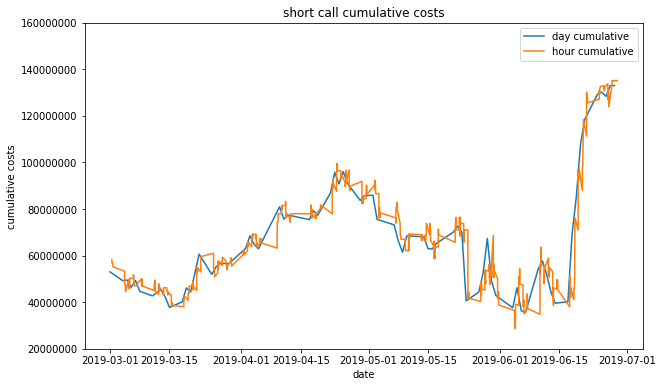

In [53]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["cumulative costs"], label="day cumulative")
plt.plot(df_sc2.index.tolist(), df_sc2["cumulative costs"], label="hour cumulative")

plt.title('short call cumulative costs')
plt.xlabel("date")
plt.ylabel("cumulative costs")

plt.legend()

yy, locs = plt.yticks()
ll = ['%.0f' % a for a in yy]
plt.yticks(yy, ll)

plt.show()

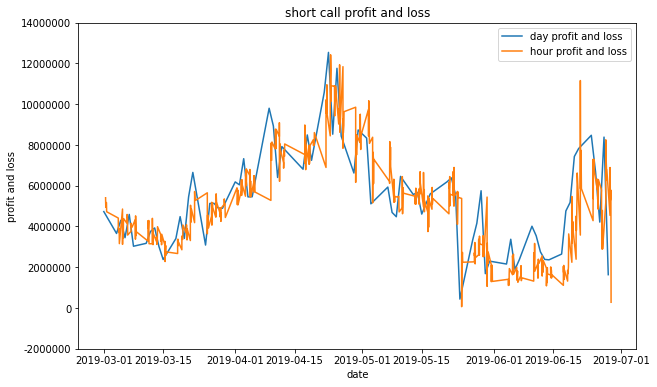

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(df_sc.index.tolist(), df_sc["profit and loss"], label="day profit and loss")
plt.plot(df_sc2.index.tolist(), df_sc2["profit and loss"], label="hour profit and loss")

plt.title('short call profit and loss')
plt.xlabel("date")
plt.ylabel("profit and loss")

plt.legend()

yy, locs = plt.yticks()
ll = ['%.0f' % a for a in yy]
plt.yticks(yy, ll)

plt.show()